In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/train.csv")

In [2]:

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 1. Cálculo da probabilidade de sobrevivência
df['Survived'].sum()/891
# 2. Cálculo da probabilidade de sobrevivência entre Homens e Mulheres
pd.crosstab(df['Survived'], df['Sex'], margins=True)
# Mulheres
#233/314
# Homens
#109/577
# 3. Cálculo da probabilidade de sobrevivência entre 1, 2 e 3a classe
# Matriz de contingência
pd.crosstab(df['Survived'], df['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [10]:
# Criação de Dummy para tratamento de uma variável categórica
dummies_Sex = pd.get_dummies(df['Sex'])
df['SexFemale'] = dummies_Sex['female']

# Separação de Amostras de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['SexFemale']], df['Survived'], test_size=0.32, random_state=25)

In [11]:
# Modelo de árvore de decisão
mod = tree.DecisionTreeClassifier()
mod = mod.fit(x_treino, y_treino)

In [12]:
# Previsão em teste
y_prev = mod.predict(x_teste)

accuracy_score(y_prev, y_teste)


0.7587412587412588

In [21]:
precision_score(y_prev, y_teste)

0.6330275229357798

In [22]:
recall_score(y_prev, y_teste)


0.7040816326530612

In [19]:
# Matriz de Confusão (Confusion Matrix)
pd.crosstab(y_prev, y_teste, margins=True)

Survived,0,1,All
row_0,,,
0,148,40,188
1,29,69,98
All,177,109,286


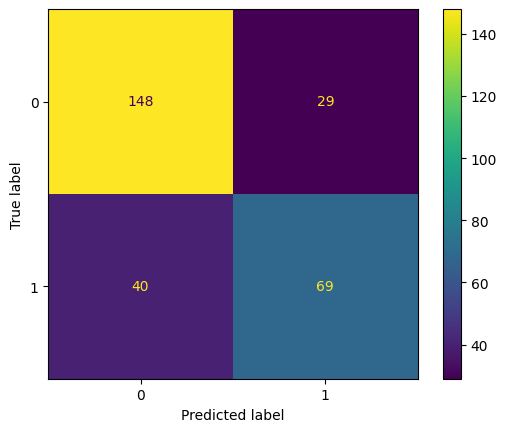

In [29]:
cm= confusion_matrix(y_teste, y_prev)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()